In [2]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#loading dataset using pandas
df=pd.read_csv("C:/Users/carfe/OneDrive/Desktop/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#updating the column names
df.columns=["State","Date","Frequency","Estimated unemployment rate","Estimated employed","Estimated labour participation rate","Region","Longitude","Latitude"]
df.head()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**Exploratory Data Analysis**

In [5]:
df.shape

(267, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated unemployment rate          267 non-null    float64
 4   Estimated employed                   267 non-null    int64  
 5   Estimated labour participation rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.describe()

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
#changing the datatype of the column name 'Date'
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

State                                          object
Date                                   datetime64[ns]
Frequency                                      object
Estimated unemployment rate                   float64
Estimated employed                              int64
Estimated labour participation rate           float64
Region                                         object
Longitude                                     float64
Latitude                                      float64
dtype: object

In [9]:
df.isnull().sum()

State                                  0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [10]:
df.duplicated().any()

False

In [11]:
#converting the columns to 'categorical' datatypes
df['Frequency']=df['Frequency'].astype('category')
df['Region']=df['Region'].astype('category')
df.dtypes

State                                          object
Date                                   datetime64[ns]
Frequency                                    category
Estimated unemployment rate                   float64
Estimated employed                              int64
Estimated labour participation rate           float64
Region                                       category
Longitude                                     float64
Latitude                                      float64
dtype: object

In [12]:
#extracting month from the Date column
df['month']=df['Date'].dt.month

In [13]:
#converting month to int format
df['month_int']=df['month'].apply(lambda x:int(x))

In [14]:
#mapping int month values to abbr month name
df['month_name']=df['month_int'].apply(lambda x:calendar.month_abbr[x])

In [15]:
df['Month']=df['month_int'].apply(lambda x:calendar.month_abbr[x])
df.head()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,month,month_int,month_name,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,1,Jan,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2,Feb,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,3,Mar,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,4,Apr,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,5,May,May


**Data Visualization**

In [16]:
unemployment_rate=df.groupby(['Month'])[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
unemployment_rate=pd.DataFrame(unemployment_rate).reset_index()
unemployment_rate

,Month,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
0,Apr,22.236154,1.057020e+07,35.297308
1,Aug,10.313333,1.442904e+07,42.390741
2,Feb,9.266154,1.548827e+07,44.180769
3,Jan,9.196538,1.563720e+07,44.626538
4,Jul,9.834444,1.441802e+07,42.274815
5,Jun,10.911111,1.385739e+07,41.203333
6,Mar,10.782593,1.453866e+07,43.746667
7,May,23.244444,1.150739e+07,39.647778
8,Oct,8.026296,1.457998e+07,41.438519
9,Sep,8.705926,1.458784e+07,41.974444


In [17]:
#plotting bar plot for unemployment rate and labor participation rate
month = unemployment_rate["Month"]
unemployment_rates = unemployment_rate["Estimated unemployment rate"]
labour_participation_rate = unemployment_rate["Estimated labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x=month, y= unemployment_rates, name = "Unemployment Rate"))
fig.add_trace(go.Bar(x= month , y = labour_participation_rate, name = "Labour participation Rate"))

fig.update_layout(title = "Unemploymnet Rate and Labour Participation rate ",xaxis= {"categoryorder":"array","categoryarray":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]})

fig.show()

**Observation:*

The labor participation remains consistently high throughout all months, while the unemployment rate varies, being highest in April and May. 

In [18]:
#Bar plot of estimated employed people in every month
import plotly.express as px
fig = px.bar(unemployment_rate, x='Month', y='Estimated employed', color='Month',category_orders = {"Month":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]},title = 'Estimated employed people from Jan 2020 to Oct 2020')

fig.show()

**Observation:*

1. January is the month where most of the people were employed
2. But the employment rate drastically decreased in the month of Apr and May 
3. From the month of June it slowly picked up the pace
4. The lowest rate of employment was in the month of Apr

**State Wise Analysis**

In [19]:
unemployment_by_state=df.groupby(["State"])[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
umemployment_by_state=pd.DataFrame(unemployment_by_state).reset_index()
unemployment_by_state

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
State,,,
Andhra Pradesh,8.664000,1.542548e+07,38.962000
Assam,4.856000,1.081028e+07,43.498000
Bihar,19.471000,2.360683e+07,37.173000
Chhattisgarh,7.819000,8.421349e+06,41.161000
Delhi,18.414000,4.632822e+06,35.857000
Goa,12.167000,4.423748e+05,39.242000
Gujarat,6.376000,2.273075e+07,45.490000
Haryana,27.477000,6.844059e+06,42.100000
Himachal Pradesh,16.065000,2.033885e+06,40.252000


In [20]:
#Box plot to find unemployment rate by state
fig=px.box(df,x='State',y='Estimated unemployment rate',color='State',title='Unemployment Rate by State')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**Observation:*

1. The state Haryana nad Tripura had the highest unemployement rate
2. Meghalaya had the lowest unemployement rate

**Correlation Heatmap**

<AxesSubplot: >

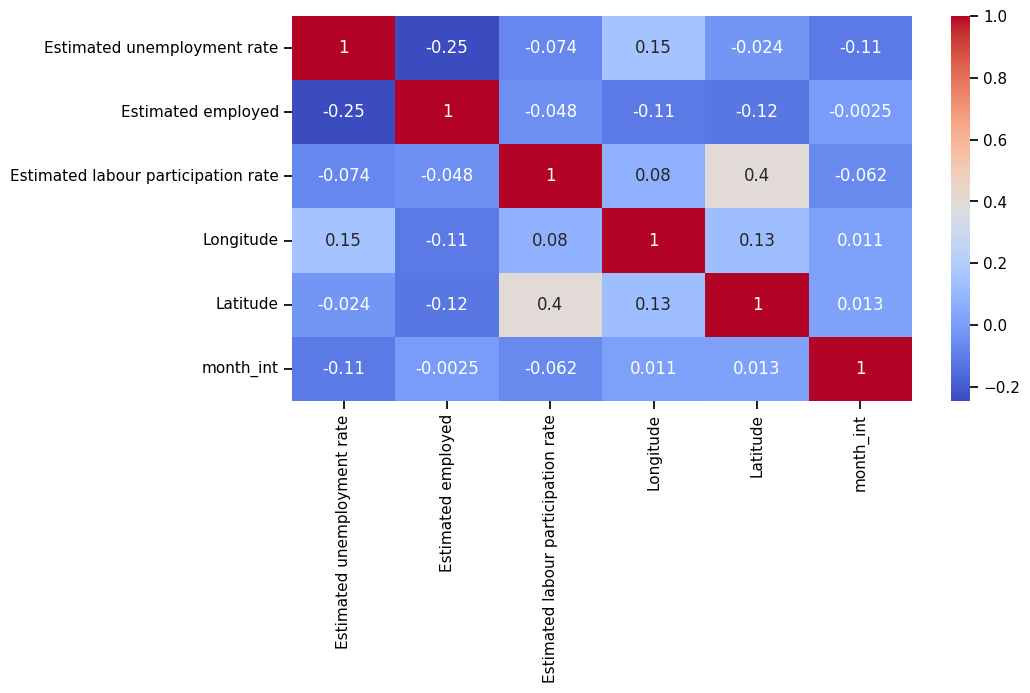

In [21]:
heat_maps=df[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate','Longitude','Latitude','month_int']]
heat_maps=heat_maps.corr()
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='coolwarm')

**Observation:*

1. The regions with higher latitudes had higher unemployment rates
2. The regions with lower latitudes had more employed people
3. The labor market fluctuated slightly over time

**Region Wise Analysis**

In [22]:
unemployment_by_region=df.groupby(["Region"])[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
umemployment_by_region=pd.DataFrame(unemployment_by_region).reset_index()
unemployment_by_region

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
Region,,,
East,13.916000,1.960237e+07,40.108750
North,15.889620,1.307249e+07,38.702658
Northeast,10.950263,3.617106e+06,52.055263
South,10.454667,1.404059e+07,40.436167
West,8.239000,1.862351e+07,41.257000


In [23]:
#Bar plot to find unemployment rate by region
fig = px.bar(df,x='Region', y='Estimated unemployment rate', color='State',title = 'Unemployment rate across region from Jan 2020 to Oct 2020')
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

**Observation:*

The North Region impacted the most 

**Unemployment rate before and after Lockdown**

In [24]:
before_lockdown=df[(df['month_int']>=1) & (df['month_int']<4)]
after_lockdown=df[(df['month_int']>=4)& (df['month_int']<=6)]

In [25]:
a_lockdown=after_lockdown.groupby('State')['Estimated unemployment rate'].mean().reset_index()
b_lockdown= before_lockdown.groupby('State')['Estimated unemployment rate'].mean().reset_index()
b_lockdown['Unemployment Rate before lockdown'] = a_lockdown['Estimated unemployment rate']

b_lockdown.columns=['State','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']

b_lockdown.head()

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [26]:
# percentage change in unemployment rate

b_lockdown['rate change in unemployment'] = round(b_lockdown['Unemployment Rate After Lockdown'] -b_lockdown['Unemployment Rate Before Lockdown']/b_lockdown['Unemployment Rate Before Lockdown'],2)
percent= b_lockdown.sort_values('rate change in unemployment')

In [27]:
#percentage change in unemployment rate after lockdown
fig = px.bar(percent, x='State',y='rate change in unemployment',color='State',title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

**Observation:*

Most impacted states are Puducherry and Jharkhand 